In [1]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import regularizers

from collections import Counter


import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


import pydot

In [2]:
import pandas as pd
reviews=pd.read_csv('C:/Users/vishe/OneDrive/Desktop/Mini_project_final_review/review_clean_countvectorize.csv')

In [3]:
reviews_train=reviews[:35000]
test_data=reviews[35000:]
reviews_train

,clean_review,emotion
0,change look iphone barely protects it. one dro...,neg
1,fits like glove. packaged great.,pos
2,screen protector arrived within week. fits pho...,pos
3,"bought ""blinged"" version case, want ruin work,...",pos
4,"think phone good. blu studio energy upgrading,...",neg
...,...,...
34995,product excellent. went ease protects well. re...,pos
34996,good case device. recommend buying one discont...,pos
34997,worked brilliantly month stopped working sudde...,pos
34998,finally easier way put screen protector on.,pos


In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(reviews_train['clean_review'].tolist(),
                                                      reviews_train['emotion'].tolist(), 
                                                      test_size=0.33,stratify = reviews_train['emotion'].tolist(),
                                                      random_state=0)

In [5]:
print('Train data len:'+str(len(X_train)))
print('Class distribution: '+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution: '+ str(Counter(y_valid)))




x_train=np.asarray(X_train)
x_valid = np.array(X_valid)
x_test =np.asarray(test_data['clean_review'].tolist())

le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))

valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

test_labels = le.transform(test_data['emotion'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

Train data len:23450
Class distribution: Counter({'pos': 17853, 'neg': 5597})
Valid data len:11550
Class distribution: Counter({'pos': 8794, 'neg': 2756})


In [6]:
train_ds,valid_ds,test_ds

(<TensorSliceDataset shapes: ((), (2,)), types: (tf.string, tf.float32)>,
 <TensorSliceDataset shapes: ((), (2,)), types: (tf.string, tf.float32)>,
 <TensorSliceDataset shapes: ((), (2,)), types: (tf.string, tf.float32)>)

In [7]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    print()
    if count==5:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    print()
    if count==5:
        break
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    print()
    if count==5:
        break

======Train dataset ====
tf.Tensor(b"give case 5 star i'm crazy it. stand hold well get set right. rubber seems like fail get older. like wide charging port relatively thin case, fit phone perfectly.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'lay flat glossy black phone. looked like sweat.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'lock button super stiff hard press.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'bought son love', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'excellent android phone meet needs', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

======Validation dataset ====
tf.Tensor(b'works like champ. need squeegee; cleaned screen application bubbles. pleased.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'works great perfect small area small room', sha

tf.Tensor(b'another one favorite nexus 5 cases. add much heft phone, add adequate protection, back clear allows nexus logo displayed.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'prior owning case fan otterbox. case seemed way big normal use. one fit bill. solid construction, low-profile, slips pocket, component need make softer rubberized material. drawback cannot used standard lightning 30-pin adapter, work around that.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'cover great. color spot really protected phone. negative center button covered case kind hard push. would recommend cover unless like clear access front button.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'something make dream come true, need laptop file someone, need little piece. connect usb good go.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'got wallet case use 

tf.Tensor(b'great case always spigen. hardly know there, keep mind, protection scratches. phone dropper, go protective case. want protect phone\'s back scratches, perfect. also "grippy", easier hold phone on.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'combo pack different colored case great! depending wat wearing, b color case use.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"disappointed blu never buy another blu phone again.. i've 5 way back kitkat issue none worked right one worst", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'inside holster like plastic. tight fit vena case on. found scratching surface iphone 6 plus.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'good charger, portable. looking light weighted one, buy this. husband uses house only.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Ten

tf.Tensor(b'charge galaxy s6 wall charger', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'v10 fit perfectly along protective case on. love it!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'installed first ever tech armor screen cover easy. watch installation video followed instructions! ballistic glass almost installed itself! bubble push out!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'happy purchase. case high quality craftsmanship price. would definitely recommend it. buy now!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'thing great! plus, give us extra free one awesome sauce! stick phone prevent phone falling! put finger phone fall! feel lot safer putting phone near water place feel phone maybe vulnerable falling! great product!!!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'far like it, 

tf.Tensor(b'update done case item description. still easily slip holster. want keep iphone safe use holster. eventually fall. 1 star lying public, issue case resolved, like item description says.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'great case. fits perfect. hardly scratch proof. come package scratched kind dried residue back. supposed do. scratched upon arival could four five star case thats picky.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'took 20 minute figure put lg phone, already otter box samsung s4. on, worried flip-out kick stand snap really look sturdy, careful it, defeat purpose protective covers.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'iphone4 case fit phone basically waste money! buying another one.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'fits great great protection phone.', shape=(), dtype=string

tf.Tensor(b'nice quality case ready size! thought going put front pocket much me. would great purse bag phone get scratched key not.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'great replacement band comfortable.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'good, material feels like quality material, fit well protects phone screen.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'torn... product sooooooo awesome!!! love it, bought two them, broke within year.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'one kind iphone smart phone case, drop many time iphone still works. co- worker mine look it, couple week pass got blue colored one..', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'awesome case! happy purchase. strong, sturdy crack easily like cheap cases. strongly recommend case. 10/10', shape=

tf.Tensor(b'*please rate helpful* first, great case. want something allows iphone withstand large fall drop lot. protection, case wonderful. feels bulky first get used within week so. main problem case within 6 months, rubber sleeve surround case get sloppy longer tight. fix problem, one best case market.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"two cable advertised, one connection (usb side) became deformed days using it....i.e. strong. second cable fine last two weeks. can't go wrong price.", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'exactly advertised. arrived fully charged. seems work vey well.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'worked 2 month interior rubber band started fail, getting loose dropping cards, cash ground. poorly designed. recommended.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'many wireless ch

tf.Tensor(b"really like phone case side can't use flash pic make pic hughe color case otherwise i'm happy", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'work easy great far', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'bought product fit hard drive desktop laptop. product work great connectivity-wise. however, laptop. fitment problem, adapter moved connector 1/16"from micro sata connector height. prevented using adapter laptop application. oh well, still worked electrically, i\'m using drive desktop laptop luck. deliver package tops. issue connector height fitment issue laptop.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'case excellent. fits phone well yet easy get off. save phone numerous times. case allows use screen protector without fitment issue well.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'ok voice poor sound quality mu

tf.Tensor(b'fit great def keep scratch away!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'love case! beautiful exactly picture. case protected phone many drop still look amazing. great buy!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'thing like case slide phone side holster instead top. realize even though look picture tell. good case clip mind feature. slim like. keep extra case. definitely recommend!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'owned s3, s4, s5. ordered similar case happy them. lightweight, add much bulk, fit perfect, save phone drops. continue buying these.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"pros: thick mean thick! using intermec 5200 scanning device work can't get zagg holds signatures, constantly checking box 9mm lead pencil measurement line use sizing specific needs outstanding. pack ten $nothin


tf.Tensor(b'really good screen protector! went really smooth come cloth "lint remover" sticky paper remove debris case apply it. bubble like plastic screen protectors.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'swear otterbox brand mobile device protection.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"first, loved case due looking stylish slim. recognizable slim. using approx. month, plastic sleeve broke bottom plug device. know reach directly see get replacement redesigned sleeve. otherwise, sleeve breaking can't use now, would great case. thanks joe.", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'great daughter loved phone. come schedule one oiece good go', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'always seem break clip product four purchased one, however, product seems withstood vigor hard work wearing it. pleased it. buy 

tf.Tensor(b'many issue product several months. nothing work should. positive sound quality excellent.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'thing trick! first cable ever owned lock actually work. clip let cable fall out. let go, stick phone. nice thick cable, well worth price. seems like durable.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'third glass protector brand protect phone damage keep replacing needed', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'bought ago husband finally started using trip took, worked great! easy put phone take out! great product!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'bought samsung galaxy price go wrong. surprised nice honest using daily issues. hold phone perfectly keep protected. must say dropped phone twice case save it. plan buying different design truly great price.', shape=(), dty

tf.Tensor(b'venezuela cell really liked many thanks amazon', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'great concept get bit whacky readusting mirror use', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'sticky, unless move lot. use rental cars lost stick. wish regular suction cup', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'purchased item use "my teenage daughter" enjoys using friends want one. short, popular item serf purpose quite nicely.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'case exactly looking for. plenty card slots. love phone removed reattached via magnet. concern lower corner case fragile cracked chipped. worry may become unable hold phone know could reorder another magnet back case.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'last all. year old usb wire still going couple mon

tf.Tensor(b'classy aluminum bumper', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'expected something better. included two screen hard align them. used edge adhere glass.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'love it. great. really protect screen.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'simply make fit nicely. perfect decorate hello kitty diy.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'perfect oem replacement, worked advertised.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'love charger!! rechargeable lithium battery recharged 500 times. work well iphone, ipod, ipad, samsung, htc others. quite small, size cigarette lighter, easily slipped purse even pocket. 4 led battery indicator show much charge left device. love fact mini take every you! received product discount price give ho

tf.Tensor(b'worked advertised. bought another one walmart pushbutton broke first use mfg give full refund even ask back. one work perfect.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'good strong cords, offer fast quick charge. need make sure additional adapter get quick charge', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'case look fit nice way slippery. definitely drop phone using case.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'wish actually covered phone side get pay for.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'sooo pretty!!! came quickly love', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'better product white version maker. fit snug, anti slip finish make big difference surfaces. one battery case use lightning connection sync charging.', shape=(), dtype=string) tf.Tensor([0. 1.], 

tf.Tensor(b'honestly favorite case', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'nice look, protective. coated inside absorb impacts', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'case excellent. sturdy well made, well aesthetically appealing. accent aluminum 6p perfectly. spigen knock park another fantastic nexus case.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'base little light, supposed', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'work well plastic protectors. always liked spigens screen shields.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'packaging extremely difficult open. seems cheaply made. several piece come apart piece tape outside device come off. even difficult get earpiece onto device, since come assembled.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'worst phone ever many. looking cheaper, way better phone, check huawei mate 2.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'price awesome, poetic brand affinity case better supcase unicorn case. subjective review since cases. definitely must buy recommended', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'love it... still working great', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'return product great. design cute case sharp edge actually cut me.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"i'm really bad phone always drop always brake screen. became pro changing screen one far best i've ever used. mention ordered mine sirtronic awesome seller got mine within days way estimated delivery time. buy affordable great product", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'strong sturdy, lo

tf.Tensor(b'great phone case! love color, perfect. case sturdy durable, constructed nice material. lightweight, love fit pocket. easy access port controls. received item discounted price return honest review.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'much better old version.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'best toughest usb cable ever owned. threw old cable since replaced one.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'nice stand. rather cord laying around, allows nice looking way charge watch option phone, too. usually stick watch it. know nice wife say so, lol.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'awesome charger cable!!!! using charger almost year still work like should. would recommend product anyone!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"best case foun

tf.Tensor(b'come eventually screen pop hard open touch screen', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'works. barely add bulk phone.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"followed directions, seal would extend edge protector. tried reset several time without success. produce black spot center. returned purchase another brand, still result. brief research i'm convinced compatible 6s claimed.", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'works extremely well like oem equipment. way cheaper buying brick-and-mortar store.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'way slippery. thankfully seller stood behind product replaced it. would recommend product caution much slippery described.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'truly attractive case special event give nice cosmeti

tf.Tensor(b'bit bulky difficult put on, job.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'work samsung tab stated.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'say recommend it!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'love case. get lot compliment it. durable affordable. love would purchase another.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'pretty great quality. look nice unless look really close. think sparkly fabric glued onto clear case.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"time buy screen protectors, always horrible time putting keeping air bubble there, dust. company give perfect instructions, go extra mile give everything need hinge method, work like charm! definitely buy time come sure recommend anyone who's looking!!", shape=(), dtype=string) tf.Tensor([0. 1.], shap

tf.Tensor(b'ok, screen protector thing still gear others wore off. actually armor sit wrist would stick matter want piece armor sticking wrist', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"let's see hold up, ride mountain bike school back.... hope one try's steal /.\\ aha need use rubber since fit perfect (as see picture)", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"worth money... well built quality product. solid rugged. buy again. update: holster clip broke 4-5 month due material quality/ workmanship. sitting car way whole 250 lbs. self smacked top armrest got severely twisted several times. i'll still buy item, careful future.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'love wires, super strong nylon color nice work qc2 qc3 ie moto turbo charging ....', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"case absolutely fantastic. cas

tf.Tensor(b'great alternative mophie charging case time', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"case bloody brilliant. recently upgraded g2 g3 went case. (got g2 case well) slim fit, decent protection, great grip quality. i'm going customer guy long time.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'sims card work great make sure call provider first mine told shouldnt bought one free. oh well needed mine immideatly got mine fast time', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'good charger small profile. reason give 5 star tends hum/buzz two device plugged in. sure humming quality issue limitation small size. overall good product work expected.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"bought mom's phone, really happy it. went easily fit perfectly.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)


tf.Tensor(b'product would fine gotten bent shipment make hard get phone correctly without air bubbles.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'excellent!! fits like glove. premium case love it.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'simple cool. seems pretty durable..', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'case fragile discolored within days putting phone. recommend product.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'great anytime catch real deal extra minutes tracfone cost bad either; end getting 2 different minutes cards add tracfone summer vacation worry much time use:> 1 year card minutes 200 minutes card tracfone phone friends family across america.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'amazing product every day life', shape=(), dtype=string) tf.Tensor([0. 1.


tf.Tensor(b"i'll make short. protect much, add nice functionality look good. add bulk weight protecting screen exclusively.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'husband loves model. comfortable fit. blocks outside noise. like room! excellent clarity.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'cover screen. fail account curvature screen several haloed gap spot phone. disappointing.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'tried work best. make sure use original wall wart. wall wart work well wireless chargers.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'fixed several iphones year tried many different screen time. now, buy icracked products. $$$ worth it. give tool need youtube video walk every step. screen even come glass screen protector already installed! cover alone worth $15-20.', shape=(), dtype=string) tf.Te

tf.Tensor(b"know does't transfer data. computer even recognize it. maybe charges. know. bothered test it. main reason bought transfer data.", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'totally love charger. works really well. good two them.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"far case fabulous! problem it... snug, think come without snapping... that's good thing guess since really want come off! also nice rubbery finish slide around dash board much! plug openings work great, problem case all, i've gotten compliment too!", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"market fairly priced cellphone settled one. really like samsung afford galaxy siii got one. phone menu options apps s-series phone near much memory new phone do. able download lot song apps. that's complaint phone. fm radio, google, internet, youtube, texting, camera, e-mail, etc. good phone.", shap

tf.Tensor(b'im enjoying case now. protects phone.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"can't believe refer case soft pudding. plastic thin. rubber softness provide protection phone!! ripoff!!", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'really nice dust catcher. love it! shipped time good condition. seller recommended.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'got free amz trader aver good case. use right really good highly recomend item.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"compact charger. keep backpack case something needs recharged i'm road. ac prong fold adapter tear luggage backpack.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'little weak... cost much expect much. job ok.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'ordered 

tf.Tensor(b'perfect, raise lip added protection, save phone many time many falls, totally recommend', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'item described. easy purchase served purpose intended.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'cord quality good, prong hold plug device recede micro usb charge device come loose. bundle bought month ago, think half still work properly. really stinks.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'cannot report anything positive card kept bing shipped regular sim moto g phone uses micro card. finally went refund. got correct micro card directly net10 micro card work great moto g, knew would. guess seller expected cell company warn users never do, namely modify biggest sim fit micro port. way risk phone trash warranty way!', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"buy it. free mont

tf.Tensor(b'phone come sd micro card slot memory expansion, slot sim card.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'chance even test it,, hold put us customs...', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'good cable design durable. micro usb connector small enough fit phone case cut out. recommend these.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'one best screen protector ever used. easy apply. would definitely buy product would buy seller again.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"great case. rubbery bounce, protecting phone falls. beautiful style. we're happy!", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'good quality, easy install. small gap around screen due iphone screen curved. believe different screen protector go edge one not. job.', shape=(), dtype=string) tf.Tensor

tf.Tensor(b'love case. best color defender series colorful girl. best protection. feel easy case phone knowing clumsy times. case little pricey comparing cases, worthed protect expensive phone. item come promised.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'maybe bad battery cause phone go bootloop make phone unusable. put old battery back presto change-o. works fine.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'prior receiving this, iphone only. never thought would change got phone. wow. simply put, beautiful. sleek design, easy use, best camera. arguably best camera phone market impressive 23 mps. (this pro dslr cameras.) love this. plus, take overseas problem thanks unlocked. freedom cell plan never looked better.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'oh work alright--just pinch yourself. cut sim right hoped for, sim still worked using little adapater put b

tf.Tensor(b'works great, long one coworkers step entire unit stupid boot crack spring assembly. still work however, rubber bands. universal electrical contact often slip off-mark battery. design better stick eye.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'super cute price great!!!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'charges phone well enough. interference radio charging, minor inconvenience part.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"like brand. i've bought icarez product before. price right. product easy apply. recommend product looking good screen protector good price point. seller got ahead schedule. would recommend seller would buy again.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'got wife\'s phone thought good cover. found button difficult operate cover never happy. ended the&nbsp;<a data-hook="product-l

tf.Tensor(b'love extra perk come galaxy. news ticker cool!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"great providing shock absorption. also like spigen's eco-conscious packaging.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'absolutely best phone holder. magnet super strong hold ease. convenient love it.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'beautiful case. keeps phone protected keep fashion look it, excellent buy!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'great phone support os lack applications. amazon app store available last update unfortunately blackberry cloud-based lock unable use it.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'easy put nice fit. block wireless charging though use that.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b

tf.Tensor(b'one favorite case phone thick, durable look great. reason give 5 star bumper around front black looking phone front really doesnt look like gold case. turn around remind case gold. bumper gold well match phone color', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'extremely powerful suction cup keep phone steady within reach. arm flexible yet sturdy price best part. fit iphone 6 plus ease glad make purchase.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"i've installed three last couple month (mine, son's, mine again... yeah dropped without case.) works fine couple exceptions. first, scrape/carve little around case edge inside power module fits. second, add foil tape area upper left quadrant (looking back) shield gps antenna back display. foil piece original oem case, really make difference gps performance.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'got mom ch

tf.Tensor(b"hmmm....i thought would ticket charge fitbit blaze without removing watch band case touchy. working fine touch it, may stop charging. can't really recommend it. like idea execution leaf bit desired. i've seen charger allow blaze remain watch band case thought would easier.", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'expected color (black) best quality good enough. wouldnt give gift good me. fit iphone 5. loose. good grip drop case doesnt fall off. compliment white iphone 5. good buy black one certain occasions becasue u like it.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'love it. work great', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'love it! makes phone look sleek!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'want use clock radio withan iphone lifeproof case,you need it. 4 word required.', shape=(), dtype=string

tf.Tensor(b'caught virus within first week accessing justvregular web sites.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'works great. love them.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'case cute protect phone well', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"original apple 12v charger work great, charge fast (especially ipad mini). afraid using anything else apple product cost replace them. can't go wrong these.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'loved lol else say lol', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'dropped phone car hit volume button got jammed, protection button get replacement phone :-(', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'like case. nice feel hand seems rugged.', shape=(), dtype=string) tf.Tensor([0. 1.], sha


tf.Tensor(b'worked efficiently 2 week straight. then. use 2 weeks. .now serve desired audio function [only reason 4 purchase], though also charge sync w/computer. all, apple product.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"great product. can't even tell screen protector on.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'great product like rotating case, great depending whether want straight sideways reading email.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'great case. stylish provides good protection phone.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'everything arrived time undamaged perfect condition love product. satisfy it. use every day work amazingly wel.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"there's point going big box store buy tempered glass screen protector...this on

tf.Tensor(b"unit charge quickly powergen hlpg-001-12w ac adapter (also purchased here). hold charge well rapidly charge iphone 5, ipod touch, plantronics headset. tried tablets would say charge smartphones 35% full least twice. small solid fit almost pocket well package also seems well built. that's left see durable long term.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'help lot, able put tomtom xl see it. car slanted windshield, never worked trying put gps there. thing slanted dashboard. works. would given 5 start except 5" screen xl fit it. put rubber band around hold place.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'super cheap well make durable! buy buy buy!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'clasp broke first time used it.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'adds bulk watch much weight. excellent purch

tf.Tensor(b'sticky! stick dashboard, instruction warn stick armor-all. use stuff.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'great product. holds iphone 5 secure release touch button. like options mounting would buy again.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'perfect fit easy put on, mess restart process. badass.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'one see anything doing. love it. im surrounded nosey people daily.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'spigen make best cases. getting phone', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'seems sturdy well make', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"iphone 6 plus fit even larger spigen case, though tight fit. workmanship material nice i've used 1/2 dozen time far complaint",

tf.Tensor(b'husband uses phone, work construction case good.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'thick, bulky horrible adhesive! definitely zagg!', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'ehh, would get something else, already got crack screen even case phone, screen protector.... brittle protector', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'exactly needed. looks great fit perfectly', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"sleek useful. thee cc slot plus secret little pocket middle keep emergency cash in. iphone fit snug it. negative case plastic phone placed seems little fragile around phone buttons. time i've put phone case careful look like break easily. purchased case discount exchange review.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"case exceeded expectations. pic


tf.Tensor(b'battery come sooner time, perfect condition. much needed glad available inexpensive price.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'far easiest effective screen protector install. quick cleaning provided pad, back strip easy remove even special pull tab remove. took 1 minute install hardly tell on! fantastic', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"great phone internal storage totally sucks! can't download 1 app! camera also horrible!", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'perfect fit great colors. use awhile start wear away noticeable. would recommend', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'bought use airplane, little electrically noisy intended use. interfered communication radio. good news excellent service vendor, insisted everything possible make happy transaction. asked more. need, people bu

tf.Tensor(b'awesome color combo great case protecting phone. love way see logo back.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"really protect screen scratch finger prints. i'll recommen product.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'charger work okay. easiest get phone spot charge. also work well cases. customer service good give refund since charger work me.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"especially like case wear purple raven's day work great me. also love texture.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'great case gs7 edge. hate putting case phone decided get one time. really like add much bulk phone get job done. confirmed dropped phone hard floor case held nicely. even tiny scratch. highly recommended.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"product g


tf.Tensor(b'okay kind hard keep cover- stand clean mess phone screen', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'followed instruction letter, ended white screened unresponsive ipod touch.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'totally pleased. good service. thank', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"i've another slim case past surprisingly protect well minor fall drops. previous case broken corner needed replaced, there's mark phone. one come selection fun colors!", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'fits well work expected.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'charger amazing. charges galaxy s5 20 minute 10% 90%. con bright blue light charger killer me.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'lean design. adds bu

tf.Tensor(b'purchased breed, honestly phone look brand new, little scratch one corner look pretty new. extremely skeptical purchasing heard lot criticism still locked verizon. reading comment indicated change apn, worked! works look like brand new.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"purchased maxoak 50000 portable charger charge device i'm go. problem it. charge samsung tablet samsung galaxy note 8 time problem all. would purchase again.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'color representative. photographer: screen calibrate wayyyy off. case works.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'exactly want great price', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'arrived day earlier expected. hard plastic still flexible cover phone without much lip reaching sides. put screen protector phone case one pull screen 

tf.Tensor(b'nice protective case paint case began chip within week', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'thing fit vent cars tried in. got import car, like audi, buy this.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'decided give try review price. pay price 1. dropped phone, bounced foot lessen blow screen protector shattered. get pay for.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'described time. good case far complaint', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'bought son, wear cords. far still using broke yet. happy mom!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'make difference phone', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'run every day. absolutely problem staying place velco detaching own. use key holder, although look small ho

tf.Tensor(b'aproblem first one replaced right away. thanks', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'use charge micro usb devices. works great. use cable nexus htc one even ipod mphiejuice pack. work great.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'phone: nexus 6 using marshmallow bulky case effective using 2+a power sources. phone needed oriented properly, right place. tried stock motorola charger could get charge, picky.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'phone comfortable check review [...] tech4 networkers', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'omg!!! phone like brand new...delivered charged battery.. flawless. good buy was.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'trouble opening hatch get cards. replaced soon got iphone 6.', shape=(), dtype=string) tf.Tensor

tf.Tensor(b'fit samsung galaxy s7 great give great look', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"work sound great that's happen while. time work.", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"lanyard look well made. i'm using ipad stylus mp3 player they're working well.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'seems work somewhat "wiggly" really give secure base set phone case standard little dock. connects phone fine. using trust hold phone securely small docking base purchased.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'works supposed to. broke dropped phone. kept bit longer 1 crack got tired point replaced it. job.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'cute great quality. neatly packed, come screen protocetor well.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,),

tf.Tensor(b'really good phone case look cool phone', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"second wrap i've bought slickwraps definitely last! love full coverage wrap give stickers side buttons. also come 2 screen protector stickers usb charger. pairing metal band bought give pebble really sleek mean look. even people ask pebble steel, along ton compliments.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'good quality price. give phone instant facelift.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'looks nice. see many charge actually get.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"bought replace ugly case phone coworker abuse phone much (e.g., sit phone back pocket). looks much better old case owner happy. there's drop damage. sure i'd thow phone concrete expect save day, might. least experience, complaints.", shape=(), dtyp

tf.Tensor(b"impressed case. far looked like make best materials nicely designed. however there's big flaw, charger/docking station apple's white cable, charge properly. frame thick bottom, block plug entering way. useless! quite disappointing. back elago s4", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'get dirty fast, nice case', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'far, good. easy put on. great price.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'good all, bumber plastic broke', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'problem month it, heavy big.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'case design cute love part. edge sharp one cut outs done poorly. overall use case sometimes always.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'decent ca

tf.Tensor(b"simply screen protector prefer anti glare time available used 2 first one test second one ace'd", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'great sister love hamsters, next best thing really, though power button little weird push, get used pretty quick', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'samsung galaxy note ii really large put belt first place, case, although extremely secure protects like one apple iphone, make almost large carry pocket. also trouble dirt getting case phone.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'great quality usb car charger really needed one ipod iphone.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'like security, design form wallet. fit back pocket like traditional wallet, feels good seem unusual even though make metal. wish small section spacers could squeeze cash small item witho

tf.Tensor(b'case work feels supportive phone slippery light however case much safer. even dropped fine!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'much great functionality quality. happy product.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'5 99 cent! good value pay. longer buy cheap screen covers. spend little get nice glass one.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'expected advertised. pleased', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'adds great look feel s4 capable device, back terrible glossy/slippery back. bought day one, 14 month owning s4, make happy.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'great way test quickcharge 2.0 quickcharge 3.0 functionality. see voltage step current draw supported given charger phone pair, allowing optimize choice given scenario (quick ch

tf.Tensor(b"product ok, easy install, part edge around phone screen stick perfectly, halo around screen protector, that, protector ok price, i'm satisfy purchase.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"complaint far. i'm using iphone 6+ incipio dual pro shine case hold fine.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"biggest knock slippery is. beyond that, i'd give 4 stars. stand flimsy feeling work stand phone landscape orientation easy access preferable stand. slippery, i'd likely keep it.", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'pink color see here.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'perfect fit, easy-on, feels look great. cool wooden package, lot accessories.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'great quality lenses. excellent customer service!', shape=(),

tf.Tensor(b'perfect case, great strong belt clip. great protection phone. velcro sucks!! need come something better velcro..', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'love it, protects cell phone bonus circle activates clock closed see clock.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'using case now! fit good! excellent product! thank', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'replaced 920 phone; want share internet locked 920 allow it. able share connection phone problems. downloaded spanish keyboard case need it. phone updated pretty quick problems, quite happy it.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'happy product, carry time. suggestion would change closure snap closure. slide hold case tightly closed card id slots. otherwise love case!!!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)


tf.Tensor(b'charging plug work promised, charge sg7 hour cable wire 3 ft thin. support fast charging. use original 5ft thicker cord come phone, registered "fast charging".', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'job nicely keps phone dry, hang around neck kayak bright enough use signaling device necessary. well made.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"got wife's phone love it. tough good looking. tempered glass protector screen case adequately protects rest phone.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'purchased item sister samsung s2. satisfy model problem connecting phone it.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"i'll leaving work pretty convenient.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'love it, mi cell safe', shape=(), dtype=string) tf.Tensor([0. 1.], 

tf.Tensor(b'fast shipping, product received pictured', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"actually fasten plastic plaque mounted side bedside table. installed hold phone charging i'm sleeping. makes accessing alarm much easier fumbling nightstand phone knocking floor. works great cord hand straight device charging.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"go-to case. 10 i've used 90% time since got phone year ago! lol. perfect fit restrict side buttons!", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"works. i've seen (3 different) velcro pull unless stapled on. thin nose nose cutout bit wide. foam cup gaffers tape perfect fit.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'broke get new one', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"best finished product work pretty well. i'm sure

tf.Tensor(b'spent lot att store similar product lasted exactly one week. work perfectly much better price.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'cheap enough, mind losing them.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'case pretty good. exactly described online description. case slim durable, however, silicone protective piece flimsy stretch easily. bottom portion protects bottom phone already stretched bit fit snug first days.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'daughter got boyfriend liked alot', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'use everyday 12 hour day great. complaints, expect.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"hands best charger ever had. initial thought would use cord charge phone micro come powerful, im i'm blown away quality product. highly r


tf.Tensor(b'item arrived time work describe', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"i've always got case every phone i've owed, iphone barely cover it. still cute case, use lot!", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'really like cover. fit great. cute. however, slippery make hard handle phone.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'loved note edge make case like this.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'really love case feels perfect one major problem send back. volume button 2 oclock morning get call landline someone trying reach me. retired 62. fix volume button put right place would love another one case looked phone 2 volume literally going', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"recently bought otterbox defender case iphone 5 love defender phone case ex

tf.Tensor(b'ordered charger monday 3:30, time got home work tuesday waiting door step. verizon want charge $25 charger. additionally cord bit longer before, nice using plugged in.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'good device good price. unlocked work great t-mobile. 5" screen look great. front stereo speaker good could get louder. probably quite good last year moto g battery life, definite plus size, sound lolipop $200.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'convenient case carry phone back pocket credit card ready. quality item last protect phone.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'cord comfortable, flexible, pretty. felt that, using cord, phone would take significantly longer charge. sure true is, noticed.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'barely reach console 2006 civic hybrid. however f

tf.Tensor(b'slim case moderate amount drop protection. sleek premium feel it.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'might actually good selfie stick, actually work phone.. work mine.. went wired style cuz 2 bluetooth sticks got work, figured wired would, n one say work phone.. thought finally, nope.. guess phone work sticks.. android kyocera 7.1.2', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"perfect son. loved phone destroyed it. say liked old iphone save 100's upgrading upgradings sake needed. great son.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'work great really small foot print.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"nice phone though storage little small. future, i'll get phone storage almost anybody fine.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'excellent cheap cas

tf.Tensor(b'nothing bad say. delivered promptly. fits galaxy s3 like glove. easy access button charger port.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'scratches easily doesnt always smooth transition finger touch', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'two drop 5 feet onto vinyl floor hairline crack screen. even hard back case. stable product there. crack spread quickly. lasted almost 2 months, good!', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"definitely would buy screen protector clear love it. rat 10 star's would win!", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'awesome! best protection iphone 6! lightweight excellent protection corner great protection phone (overall) kids, best choice inexpensive many color choose easy use high quality (at least me) button easy push, problem well. bulky', shape=(), dtype=string) tf.T

tf.Tensor(b'case nice, durable rugged time offers great protection phone. hybrid thin armor offers great protection drops, shock, dirt dust. easy install phone button easily accessible. anti slip better gripping le dropping. offered item reduced rate fair review', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'ive days far darn good phone battery life best. im ordering another battery see improves.. reason give five star battery life...', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'well built, feels solid heavier expected. love multiple angle flexibility different uses. desks/hard flat surface only. (too small narrow balance uneven surfaces) primarily use my&nbsp;<a data-hook="product-link-linked" class="a-link-normal" href="/asus-mb-mb168b-15-6-inch-screen-led-lit-monitor/dp/b00h0fk2a6/ref=cm_cr_arp_d_rvw_txt?ie=utf8">asus mb mb168b+ 15.6-inch screen led-lit monitor</a>monitor traveling lieu case stand. small f

tf.Tensor(b"heaviest built cable i've ever seen", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'simple install work well. bubbles, water proof, shower swimming.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"hard put on. lots bubbles. clear.wouldn't buy recommend.", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'love charger! fast old white model. sometimes fast worry might bad battery. far good say anker take care customers.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'bad phone. people buy it.when speak phone, listen other.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'simply beautiful case. hope long time. great reminder infinite love gratitude~ love it!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'plastic cover started peel away pretty quickly. expect last

tf.Tensor(b'fits nice snug son phone! protects well.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'must person go especially immediate access car charger electrical outlet. portable fit pocket purse. great quick charge. order product again.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'cute, great color top stay closed tightly.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'small thought would be, ended selling them. looking for.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'case really great. add bit bulk trade-off superior fit protection. corner ballistic case best feature. wife used case phone saver least week.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'little loose bottom since hard shell wrap around sides, protects phone well. pink nice, jewel nice touch.', shape=(), dtype=string) tf.Ten

tf.Tensor(b'love iphone 6 without case... little one always want play take pictures, case best! pink bit bright, like knowing phone completely protected. otterbox best.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'best buy. 1/3 cost vz upgrade change plan (i would went thru vz)', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'case great fit still allows access ports. look good feels comfortable. best feature rubber body actually inside hardshell outside like defender model. love it.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'leopard part like cheap leather cardboard. side cracked model phone little part turn volume broke. cheap pretty. diamond fell off.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'recommend case. like ultra hybrid case loose. phone wiggle around it. odd edge think people like. purely case offers scratch protection

tf.Tensor(b"bottom charger cord go go way there's rubber piece preventin flap pushed close it. paint started chipping two days put phone. would recommend product.", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'cannot cheap. great quality feels like million bucks. fit 3 card comfortably, attempt add cards, may get slightly bulky. magnetic flap still closed least 5/6 card there. mom loved it! update thing prone getting dirty. happen stain in, better throwing getting another one. taking star due that.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'although case look good spacious, poorly constructed. metal lip cover tip belt clip fall off, cause faux-leather unravel, exposing metal. careful, ruin belt clothing. recommend item, unless case find accommodate phone.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'works great. use android phone using cell phone navigation long trips

tf.Tensor(b'makes accessing side phone little difficult, good. love kickstand. awhile matte finish silicone start fade shine bad.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"can't wait try new iphone looks like last", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'defective os super buggy performane', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'good protection design present problem using camera.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'iphone 4 bad screen. battery maybe swollen', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'expect replace every 6 months. leather nice, thin. also probably need cut notch around power cable larger get plug seat fully. deal issues, nice looking cover phone. seller accommodating issue initial purchase, work resolve it.', shape=(), dtype=string) tf.Tensor([0. 1.]

tf.Tensor(b'bought month ago crack breaks. good far.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'love hard text screen thick tempered glass it.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'nice. everything expected be. order needed. screen protector well worth money save glass screens.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'good job charging samasung s5 recharges pretty fast great people go', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'shield useless. flimsy. thin piece soft flexible plastic. hard get alta. on, catch everything pull off. gone 3 already le week (tuesday today) got alta thursday. on! also charging 2.99 shipping send typical white office envelope .48c stamp it!', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'snapped trouble keep pulling screen saver accident running hand e

tf.Tensor(b'great case ultra low profile. plastic bit thin still offers normal wear tear protection. would help dropped two feet strong case, personally would sacrifice protection lower profile. cut outs button port perfect. give case company review would recommend it!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'thicker expected. quality seems ok phone seems unelegant much larger it. leaving use vacation only.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'great case price. rubber add enough grip case bulk phone little.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'perfect are!! pretty pattern fit phone quite well. like switch easily but, stay easy remove well.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'fit blaze perfectly allows easy change bands.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tenso

tf.Tensor(b'got free. good product fast easy put on. works good brands', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'went easily two phones, manage get dust mark kind. two week still looking good. happy purchase.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'works great. protects drops. easy apply.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'excellent little pin fit headphone jack phone tablet. work great really cute. got mom hit letter touch screen phone had. many, give one shared family.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"got dad's girlfriend first smartphone. work well needs. calling, texting, messaging, facebook. battery life good. display obviously par flagships. good package price.", shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'great product.... searched iorange-e found veckle

tf.Tensor(b'got myy wife. expecting get enlighten. rubberized all. hard plastic.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"google cardboard awesome. great vr immersion, peak future. cardboard experiences, get chromevr app, vrcinema app google play. i've found 2 best cardboard.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"really like this...exactly needed since many device charge via usb. went trip recently one belkin 3 port ac adapter also 2 usb port side. charge external usb charger/batteries...very inconvenient find hard way. i'm using anker device home great. look forward take next family vacation cover phones/cameras/etc. outputs enough juice gear :)", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'hold charge. drains faster old battery', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'holster clip loose, twist come pocket!', shap


tf.Tensor(b'wife picked phone seems like it.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'thats watch great! comfortable color chose natches picture. purchasing brand another color.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'horrible! worked day, stoped, waste money. buy!', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'lg g3 phone fit charger cradle phone case even insert removed. also plug charger connect power cord come loose first time use it. happy', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b"super cute fit phone perfectly. change case often corner starting get cracked removing frequently. can't tell though phone right i'm still using it.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'good product would buy again.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

t

tf.Tensor(b'great fit easy installation. phone slid right without issue. also, like button case stiff require added pressure get button phone react. prevents accidental volume change lock/power button presses.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'like feel protection', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'love find short cord must -- wish it, think ended spending another $40 everything needed. still worth get rid clutter! drilled whole kitchen cabinet hidden counter.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"i've never owned selfie stick, first. think gadget pretty cool. connects bluetooth, super easy figure out. we've enjoyed using it. thing like extender place cell phone is, super hard extend. phone got scratched place one sided, i'm giving 4 stars.", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b"easy install, fe

tf.Tensor(b"bought wife's samsung epic 4g touch. looks great love feel color. happy i'm happy!", shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'great phone cover, supcase product always delivered different. love', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'nice holder read purchasing..make sure phone compatible. htc one charge mount. saw htc think twice read thoroughly.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'works great ,but easy break ....', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'really like case! feels sturdy feels nice hand. definitely recommend!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'fits phone well appears lifting screen protector.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'love case strong protective easy install slimline', shape=

tf.Tensor(b'work galaxy s4. people say sometimes works, time not.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'return, work verizon network. problem device. thank you..', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'problem charger all. work exactly described would recommend samsung galaxy note 4 user.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'powerful back battery ever found! awesome! never go trip without it! never afraid run low battery powered devices! perfect!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'protects well, work wireless charging', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'best car charger found far. well worth price', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'work flawlessly due strong magnet, due favor get one, dissapointed.', s

tf.Tensor(b'received galaxy s6 interchangeable phone case discount exchange honest unbiased review. think really cool idea interchangeable cases. get bored case, so, cool options. case high quality fit phone perfectly. case look great well offering phone great protection. love them!', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'always handy. easy use. charges fast.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'good case, lot protection. headphone fit jack case.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'terrific time need charge phone continue use simultaneously. able sufficiently hold 5.7" screen lg v20. using anker power line charging cord thicker mean need place stand end desk charging. problem. great product reasonable price, purchased 4 handy around office home.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'good quality, ear

tf.Tensor(b'nice could use strengthening strap hook eyehole case.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'received installed it, really watch video. vendor contacted offfered new one asked follow directions. soon received, follow direction yes product great! thanks- recomend it.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'work good price much say far broke seems fit purpose. received product discount honest review.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'amazing device. purchased friend whose charge port sgs3 gone bad. slipped qi receiver worked really well! claim charge much faster micro usb port,but probably issue has. max charge 750ma, le stock charger 1000ma. (the lower number, longer take get full charge). recommended purchase anyone switching wireless qi charging 3 coils ensure center phone charger perfectly.', shape=(), dtype=string) tf.Tensor([0. 1.

tf.Tensor(b'otterbox fan also love defender cases. look great g6. fit snugly easy use.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'cute bright preppy color like sticky enough hang onto dashboard computer whatever', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'far working fine, hopefully last time order chargers.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'great case money. fits look great.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'bad product. worked well 1 month stopped working. waste money buy.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)

tf.Tensor(b'gets job done. quite thought ordering though.', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)

tf.Tensor(b'great low price nice case', shape=(), dtype=string) tf.Tensor([0. 1.], shape=(2,), dtype=float32)



In [13]:
print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

['pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos']
Text to number
[1 0 0 1 1 0 1 1 1 1]
Number to category
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [14]:
count=0
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==1:
        break

tf.Tensor(b'keeps phone safe. pretty heavy bulky though.', shape=(), dtype=string) tf.Tensor([1. 0.], shape=(2,), dtype=float32)


In [15]:
embedding = "https://tfhub.dev/google/tf2-preview/nnlm-en-dim50/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [16]:
print(x_train[1])
print([x_train[1]])
hub_layer([x_train[1]])

lay flat glossy black phone. looked like sweat.
['lay flat glossy black phone. looked like sweat.']


<tf.Tensor: shape=(1, 50), dtype=float32, numpy=
array([[ 0.36106718, -0.24986903, -0.2808041 , -0.12377873, -0.09167913,
        -0.03699941,  0.15002254, -0.09155184, -0.19181432,  0.20466162,
         0.05930863,  0.17504981,  0.00907018,  0.23189929, -0.27425137,
        -0.03581263,  0.42376646,  0.25766024,  0.17560785, -0.36976346,
        -0.2267539 , -0.1904869 ,  0.02561516, -0.07329025, -0.06670208,
        -0.24883871,  0.24395514, -0.1103471 ,  0.3644021 , -0.06549709,
        -0.09923299,  0.17369685,  0.00170256, -0.17719696, -0.00086153,
        -0.22820716, -0.03384545,  0.53200984,  0.09806117, -0.12923606,
        -0.09206749,  0.14858173,  0.09459314,  0.17149138, -0.26425052,
        -0.12910204, -0.09923452,  0.13531035,  0.1672326 , -0.00141328]],
      dtype=float32)>

In [17]:
from tensorflow.keras import activations


model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(25, activation='relu'))
model.add(tf.keras.layers.Dense(12, activation='relu'))
model.add(tf.keras.layers.Dense(2,activation='softmax'))



model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["CategoricalAccuracy"])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 50)                48190600  
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 26        
Total params: 48,192,213
Trainable params: 48,192,213
Non-trainable params: 0
_________________________________________________________________


In [18]:
import pydot
import pydotplus
import graphviz

In [ ]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    epochs = 40
    history = model.fit(train_ds.batch(1000),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1000),
                    verbose=1)


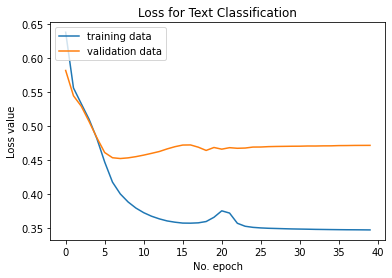

In [15]:
plt.plot(model.history.history['loss'], label='training data')
plt.plot(model.history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

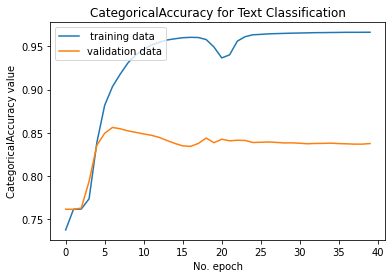

In [16]:
plt.plot(model.history.history['CategoricalAccuracy'], label=' training data')
plt.plot(model.history.history['val_CategoricalAccuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [17]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test,test_labels)
print("test loss, test acc:", results)


# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Evaluate on test data
5000/5000 [==============================] - 2s 347us/sample - loss: 0.4743 - CategoricalAccuracy: 0.8340
test loss, test acc: [0.4743399960041046, 0.834]
Generate predictions for all samples
[[5.7055697e-02 9.4294429e-01]
 [3.2831136e-05 9.9996722e-01]
 [9.9502820e-01 4.9717706e-03]
 ...
 [1.0000000e+00 1.5565714e-08]
 [7.9282951e-01 2.0717049e-01]
 [2.7103971e-07 9.9999976e-01]]


In [18]:
x=test_data
predict_results

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [19]:
x_test,predict_results

(array(['keeps phone safe. pretty heavy bulky though.',
        'liked phone working well.',
        'phone problem hotspot, tried hotspot share netwwork device', ...,
        'bad product. worked well 1 month stopped working. waste money buy.',
        'gets job done. quite thought ordering though.',
        'great low price nice case'], dtype='<U602'),
 array([1, 1, 0, ..., 0, 0, 1], dtype=int64))

# Let us try Dropout and kernel regularizer to reduce overfitting of the previous model

Dropout

https://www.tensorflow.org/api_docs/python/tf/nn/dropout

Dropout is useful for regularizing DNN models. Inputs elements are randomly set to zero (and the other elements are rescaled). This encourages each node to be independently useful, as it cannot rely on the output of other nodes.
More precisely: With probability rate elements of x are set to 0. The remaining elements are scaled up by 1.0 / (1 - rate), so that the expected value is preserved. 

In [20]:
model1 = tf.keras.Sequential()
model1.add(hub_layer)
model1.add(tf.keras.layers.Dropout(0.3))
model1.add(tf.keras.layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.0)))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.0)))
model1.add(tf.keras.layers.Dense(2,activation='softmax',kernel_regularizer=regularizers.l2(0.0)))


model1.summary()
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["CategoricalAccuracy"])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 48,191,242
Trainable params: 48,191,242
Non-trainable params: 0
__________________________________________

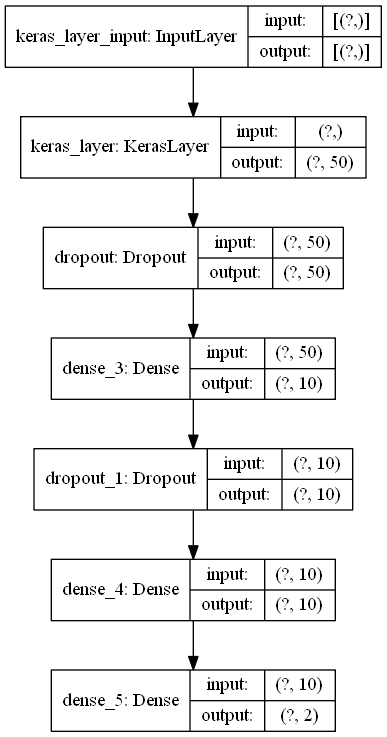

In [21]:
tf.keras.utils.plot_model(model1, "multi_input_and_output_model.png", show_shapes=True)

In [22]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    epochs = 15
    history1 = model1.fit(train_ds.batch(1000),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(1000),
                    verbose=1)


Train for 24 steps, validate for 12 steps
Epoch 1/15
24/24 [==============================] - 4s 167ms/step - loss: 0.6992 - CategoricalAccuracy: 0.5201 - val_loss: 0.6501 - val_CategoricalAccuracy: 0.7798
Epoch 2/15
24/24 [==============================] - 2s 97ms/step - loss: 0.6281 - CategoricalAccuracy: 0.7713 - val_loss: 0.5920 - val_CategoricalAccuracy: 0.7712
Epoch 3/15
24/24 [==============================] - 2s 94ms/step - loss: 0.5729 - CategoricalAccuracy: 0.7881 - val_loss: 0.5427 - val_CategoricalAccuracy: 0.7810
Epoch 4/15
24/24 [==============================] - 2s 92ms/step - loss: 0.5273 - CategoricalAccuracy: 0.8123 - val_loss: 0.5067 - val_CategoricalAccuracy: 0.8121
Epoch 5/15
24/24 [==============================] - 2s 91ms/step - loss: 0.4897 - CategoricalAccuracy: 0.8452 - val_loss: 0.4777 - val_CategoricalAccuracy: 0.8403
Epoch 6/15
24/24 [==============================] - 2s 91ms/step - loss: 0.4605 - CategoricalAccuracy: 0.8678 - val_loss: 0.4644 - val_Categor

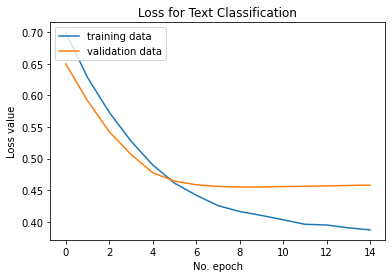

In [23]:
plt.plot(model1.history.history['loss'], label='training data')
plt.plot(model1.history.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

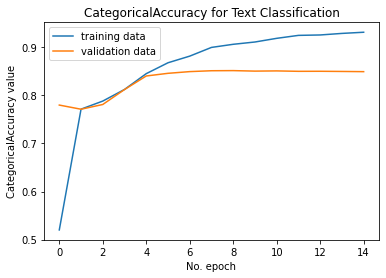

In [24]:
plt.plot(model1.history.history['CategoricalAccuracy'], label='training data')
plt.plot(model1.history.history['val_CategoricalAccuracy'], label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [25]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model1.evaluate(x_test,test_labels)
print("test loss, test acc:", results)


# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = model1.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Evaluate on test data
5000/5000 [==============================] - 2s 316us/sample - loss: 0.4591 - CategoricalAccuracy: 0.8460
test loss, test acc: [0.4590514982700348, 0.846]
Generate predictions for all samples
[[3.5301503e-02 9.6469849e-01]
 [3.8131932e-03 9.9618679e-01]
 [8.4428686e-01 1.5571310e-01]
 ...
 [9.9997866e-01 2.1342141e-05]
 [6.2580806e-01 3.7419188e-01]
 [2.3910234e-05 9.9997604e-01]]


In [26]:
final_test=test_data.copy(deep=True)
final_test['pred_sentiment']= predict_results
final_test

,clean_review,emotion,pred_sentiment
35000,keeps phone safe. pretty heavy bulky though.,neg,1
35001,liked phone working well.,pos,1
35002,"phone problem hotspot, tried hotspot share net...",neg,0
35003,got part gift promotion bought 9000ah external...,pos,1
35004,purchased cable google nexus 6p. although phon...,pos,1
...,...,...,...
39995,"far working fine, hopefully last time order ch...",pos,1
39996,great case money. fits look great.,pos,1
39997,bad product. worked well 1 month stopped worki...,neg,0
39998,gets job done. quite thought ordering though.,pos,0


In [27]:
final_test['pred_sentiment'] = np.where((final_test.pred_sentiment == 0),'neg',final_test.pred_sentiment)
final_test['pred_sentiment'] = np.where((final_test.pred_sentiment == '1'),'pos',final_test.pred_sentiment)
final_test

,clean_review,emotion,pred_sentiment
35000,keeps phone safe. pretty heavy bulky though.,neg,pos
35001,liked phone working well.,pos,pos
35002,"phone problem hotspot, tried hotspot share net...",neg,neg
35003,got part gift promotion bought 9000ah external...,pos,pos
35004,purchased cable google nexus 6p. although phon...,pos,pos
...,...,...,...
39995,"far working fine, hopefully last time order ch...",pos,pos
39996,great case money. fits look great.,pos,pos
39997,bad product. worked well 1 month stopped worki...,neg,neg
39998,gets job done. quite thought ordering though.,pos,neg


In [28]:
from sklearn.metrics import classification_report
print(classification_report(final_test['emotion'].tolist(),final_test['pred_sentiment'].tolist()))
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(final_test['emotion'].tolist(),final_test['pred_sentiment'].tolist())
print('Confusion matrix : \n',matrix)

              precision    recall  f1-score   support

         neg       0.73      0.63      0.68      1276
         pos       0.88      0.92      0.90      3724

    accuracy                           0.85      5000
   macro avg       0.80      0.78      0.79      5000
weighted avg       0.84      0.85      0.84      5000

Confusion matrix : 
 [[ 808  468]
 [ 302 3422]]


In [34]:
model1.save('my_model.h5')

In [30]:
new_model = tf.keras.models.load_model('C:\\Users\\vishe\\OneDrive\\Desktop\\Mini_project_final_review')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 50)                48190600  
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 22        
Total params: 48,191,242
Trainable params: 48,191,242
Non-trainable params: 0
__________________________________________

In [31]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = new_model.evaluate(x_test,test_labels)
print("test loss, test acc:", results)


# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = new_model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)



Evaluate on test data
5000/5000 [==============================] - 2s 330us/sample - loss: 0.4591 - CategoricalAccuracy: 0.8460
test loss, test acc: [0.4590514982700348, 0.846]
Generate predictions for all samples
[[3.5301503e-02 9.6469849e-01]
 [3.8131932e-03 9.9618679e-01]
 [8.4428686e-01 1.5571310e-01]
 ...
 [9.9997866e-01 2.1342141e-05]
 [6.2580806e-01 3.7419188e-01]
 [2.3910234e-05 9.9997604e-01]]
